In [1]:
import matplotlib
import numpy as np
from scipy.spatial import KDTree
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os 
import sys

# Add the parent directory to the system path


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [73]:
'''
point cloud data is stored as a 2D matrix
each row has 3 values i.e. the x, y, z value for a point

Project has to be submitted to github in the private folder assigned to you
Readme file should have the numerical values as described in each task
Create a folder to store the images as described in the tasks.

Try to create commits and version for each task.

'''


#%% read file containing point cloud data
pcd = np.load("dataset1.npy")
pcd2 = np.load("dataset2.npy")
print("Point cloud data shape:", pcd.shape)
# pcd.shape
#%% show downsampled data in external window

# %matplotlib qt
# show_cloud(pcd[::100]) # keep every 100th point


Point cloud data shape: (72067, 3)


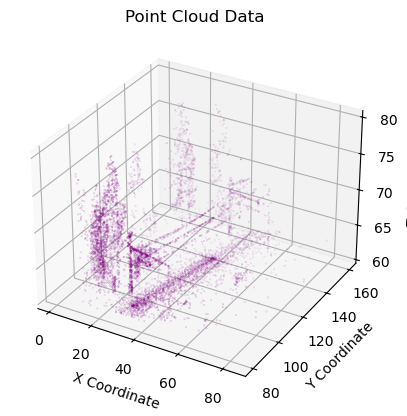

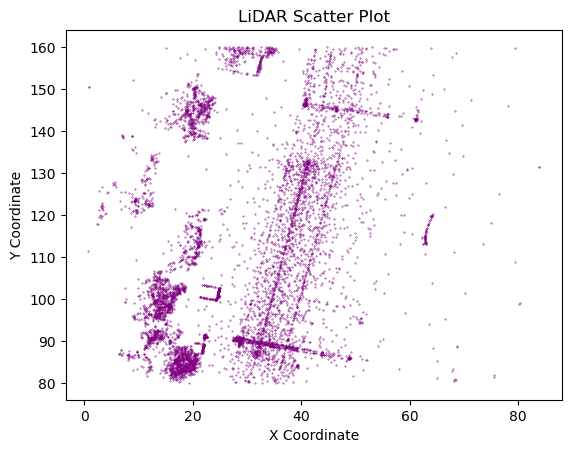

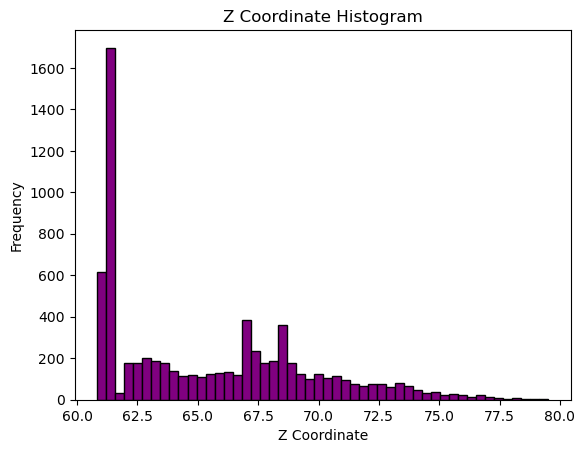

Histogram counts: [ 617. 1697.   31.  179.  177.  201.  189.  177.  138.  114.  119.  108.
  123.  127.  134.  121.  386.  236.  175.  188.  360.  177.  126.   98.
  126.  105.  113.   96.   74.   67.   76.   78.   63.   79.   66.   48.
   33.   37.   24.   26.   22.   13.   21.   13.    9.    3.    7.    3.
    3.    4.]
Histogram bins: [60.837  61.2106 61.5842 61.9578 62.3314 62.705  63.0786 63.4522 63.8258
 64.1994 64.573  64.9466 65.3202 65.6938 66.0674 66.441  66.8146 67.1882
 67.5618 67.9354 68.309  68.6826 69.0562 69.4298 69.8034 70.177  70.5506
 70.9242 71.2978 71.6714 72.045  72.4186 72.7922 73.1658 73.5394 73.913
 74.2866 74.6602 75.0338 75.4074 75.781  76.1546 76.5282 76.9018 77.2754
 77.649  78.0226 78.3962 78.7698 79.1434 79.517 ]
Highest frequency: 1697.0
Index of highest frequency bin: 1
Ground level Z value: 61.58419999999999


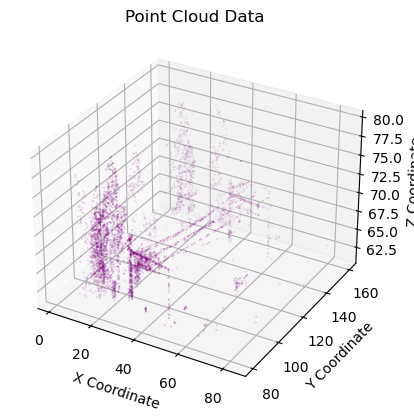

In [40]:
'''
Task 1 (3)
find the best value for the ground level
One way to do it is useing a histogram 
np.histogram

update the function get_ground_level() with your changes

For both the datasets
Report the ground level in the readme file in your github project
Add the histogram plots to your project readme
'''
downSampled_pdc = pcd[::10]

def show_cloud(points_plt):
    ax = plt.axes(projection='3d')
    ax.set_title("Point Cloud Data")
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_zlabel("Z Coordinate")
    ax.scatter(points_plt[:,0], points_plt[:,1], points_plt[:,2], c='purple',s=0.01)
    plt.show()
show_cloud(downSampled_pdc)


x = downSampled_pdc[:,0]
y= downSampled_pdc[:,1]
z = downSampled_pdc[:,2]

def show_scatter(x,y):
    plt.scatter(x, y, c='purple', s=0.1)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("LiDAR Scatter Plot")
    plt.show()
show_scatter(x, y)

counts, bins, patches= plt.hist(z, color='purple', bins=50, edgecolor='black')
plt.title("Z Coordinate Histogram")
plt.xlabel("Z Coordinate")
plt.ylabel("Frequency")
plt.show()

print("Histogram counts:", counts)
print("Histogram bins:", bins)
def get_ground_level(counts, bins):
    
    max_frequency = np.max(counts)
    print("Highest frequency:", max_frequency)
    max_index = np.argmax(counts)
    print("Index of highest frequency bin:", max_index)
    bin_value = bins[max_index + 1]
    
    # here we use the right edge of the bin
    
    print("Ground level Z value:", bin_value)
    return bin_value
est_ground_level = get_ground_level(counts, bins)

pcd_above_ground = downSampled_pdc[downSampled_pdc[:,2] > est_ground_level] 

pcd_above_ground.shape

#%% side view
show_cloud(pcd_above_ground)

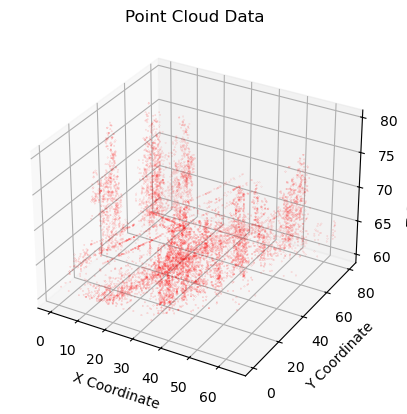

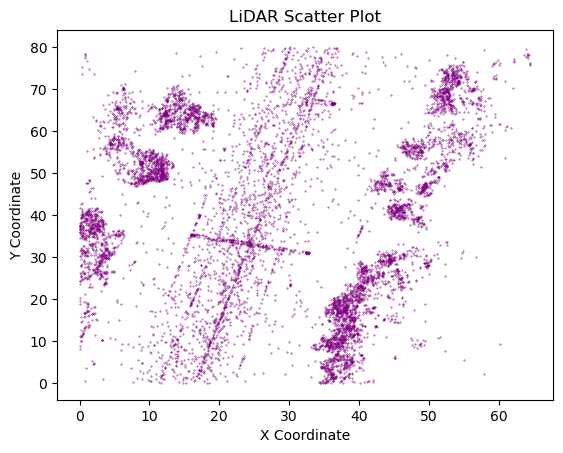

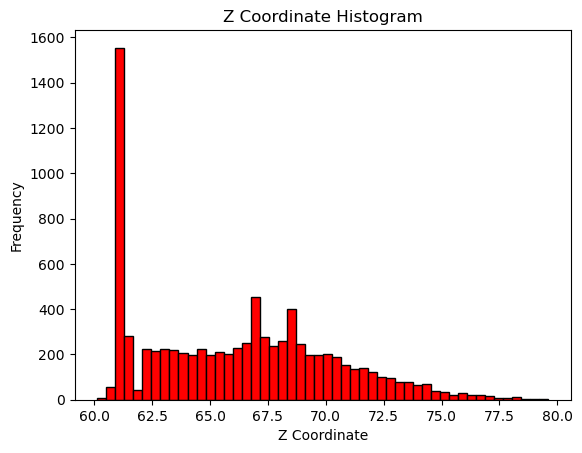

Histogram counts: [   8.   57. 1554.  281.   42.  222.  214.  224.  220.  206.  196.  225.
  198.  212.  202.  230.  249.  452.  275.  239.  261.  402.  248.  196.
  198.  203.  187.  155.  135.  142.  122.  101.   96.   80.   79.   64.
   69.   39.   32.   23.   29.   19.   19.   18.    7.    7.   13.    4.
    3.    2.]
Histogram bins: [60.126   60.51564 60.90528 61.29492 61.68456 62.0742  62.46384 62.85348
 63.24312 63.63276 64.0224  64.41204 64.80168 65.19132 65.58096 65.9706
 66.36024 66.74988 67.13952 67.52916 67.9188  68.30844 68.69808 69.08772
 69.47736 69.867   70.25664 70.64628 71.03592 71.42556 71.8152  72.20484
 72.59448 72.98412 73.37376 73.7634  74.15304 74.54268 74.93232 75.32196
 75.7116  76.10124 76.49088 76.88052 77.27016 77.6598  78.04944 78.43908
 78.82872 79.21836 79.608  ]
Highest frequency: 1554.0
Index of highest frequency bin: 2
Ground level Z value: 61.29492000000003


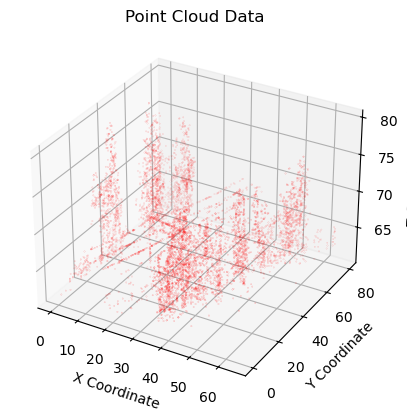

In [76]:
'''
Task 1 (3)
find the best value for the ground level
One way to do it is useing a histogram 
np.histogram

update the function get_ground_level() with your changes

For both the datasets
Report the ground level in the readme file in your github project
Add the histogram plots to your project readme
'''
downSampled_pdc2 = pcd2[::10]

def show_cloud(points_plt):
    ax = plt.axes(projection='3d')
    ax.set_title("Point Cloud Data")
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_zlabel("Z Coordinate")
    ax.scatter(points_plt[:,0], points_plt[:,1], points_plt[:,2], c='red',s=0.01)
    plt.show()
show_cloud(downSampled_pdc2)


x_2 = downSampled_pdc2[:,0]
y_2= downSampled_pdc2[:,1]
z_2 = downSampled_pdc2[:,2]

show_scatter(x_2, y_2)

counts, bins, patches= plt.hist(z_2, color='red', bins=50, edgecolor='black')
plt.title("Z Coordinate Histogram")
plt.xlabel("Z Coordinate")
plt.ylabel("Frequency")
plt.show()

print("Histogram counts:", counts)
print("Histogram bins:", bins)

est_ground_level2 = get_ground_level(counts, bins)

pcd2_above_ground = downSampled_pdc2[downSampled_pdc2[:,2] > est_ground_level2] 

pcd2_above_ground.shape

#%% side view
show_cloud(pcd2_above_ground)

In [59]:
'''
Task 2 (+1)

Find an optimized value for eps.
Plot the elbow and extract the optimal value from the plot
Apply DBSCAN again with the new eps value and confirm visually that clusters are proper

https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/
https://machinelearningknowledge.ai/tutorial-for-dbscan-clustering-in-python-sklearn/

For both the datasets
Report the optimal value of eps in the Readme to your github project
Add the elbow plots to your github project Readme
Add the cluster plots to your github project Readme
'''



'\nTask 2 (+1)\n\nFind an optimized value for eps.\nPlot the elbow and extract the optimal value from the plot\nApply DBSCAN again with the new eps value and confirm visually that clusters are proper\n\nhttps://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/\nhttps://machinelearningknowledge.ai/tutorial-for-dbscan-clustering-in-python-sklearn/\n\nFor both the datasets\nReport the optimal value of eps in the Readme to your github project\nAdd the elbow plots to your github project Readme\nAdd the cluster plots to your github project Readme\n'

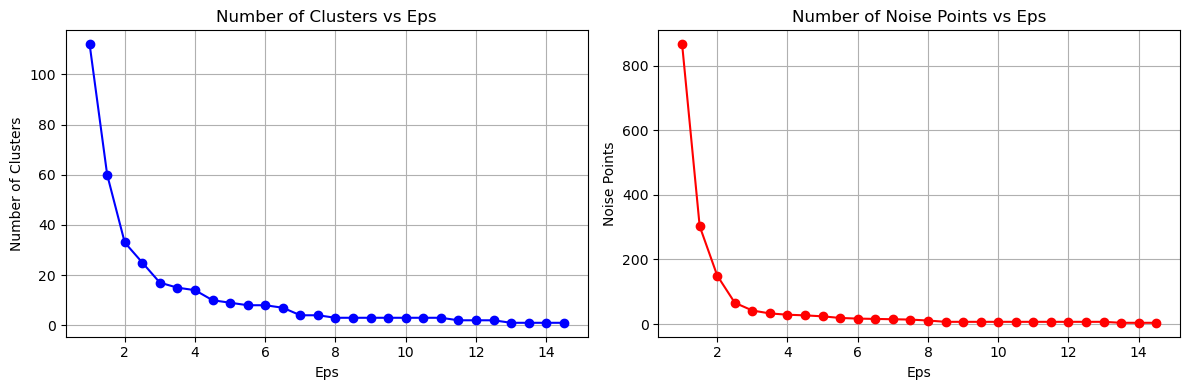

Optimal eps: 3.0


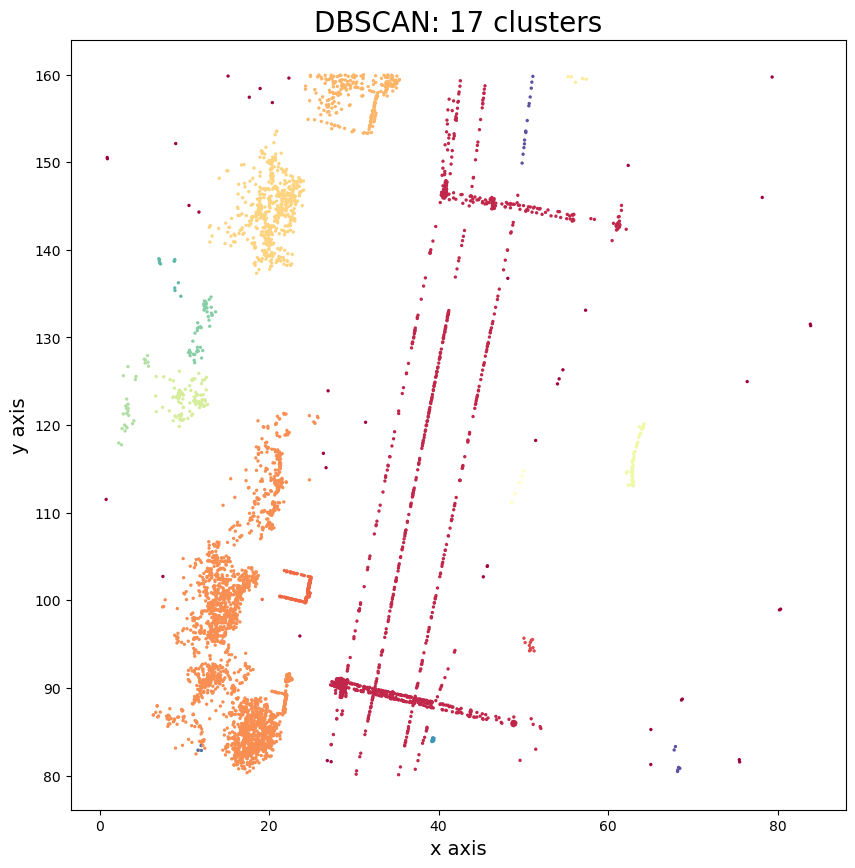

In [72]:
eps_values = np.arange(1,15,0.5)
cluster_counts = []
noise_counts = []
for eps in eps_values:
    clustering = DBSCAN(eps = eps, min_samples=5).fit(pcd_above_ground)
    clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
    cluster_counts.append(clusters)
    noise = list(clustering.labels_).count(-1)
    noise_counts.append(noise)
    
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(eps_values, cluster_counts, 'b-o')
plt.title('Number of Clusters vs Eps')
plt.xlabel('Eps')
plt.ylabel('Number of Clusters')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(eps_values, noise_counts, 'r-o')
plt.title('Number of Noise Points vs Eps')
plt.xlabel('Eps')
plt.ylabel('Noise Points')
plt.grid(True)

plt.tight_layout()
plt.show()


def find_elbow_distance_method(eps_values, cluster_counts):
   
    eps_values = np.array(eps_values)
    cluster_counts = np.array(cluster_counts)
    x_norm = (eps_values - eps_values[0]) / (eps_values[-1] - eps_values[0])
    y_norm = (cluster_counts - cluster_counts[0]) / (cluster_counts[-1] - cluster_counts[0])
    
    distances = []
    for i in range(len(x_norm)):
        distance = abs(y_norm[i] - x_norm[i])
        distances.append(distance)
    
    elbow_index = np.argmax(distances)
    return eps_values[elbow_index]


optimal_eps = find_elbow_distance_method(eps_values, cluster_counts)
print(f"Optimal eps: {optimal_eps}")

unoptimal_eps = 3
# find the elbow
clustering = DBSCAN(eps = unoptimal_eps, min_samples=5).fit(pcd_above_ground)

#%%
clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, clusters)]

# %%
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(pcd_above_ground[:,0], 
            pcd_above_ground[:,1],
            c=clustering.labels_,
            cmap=matplotlib.colors.ListedColormap(colors),
            s=2)


plt.title('DBSCAN: %d clusters' % clusters,fontsize=20)
plt.xlabel('x axis',fontsize=14)
plt.ylabel('y axis',fontsize=14)
plt.show()

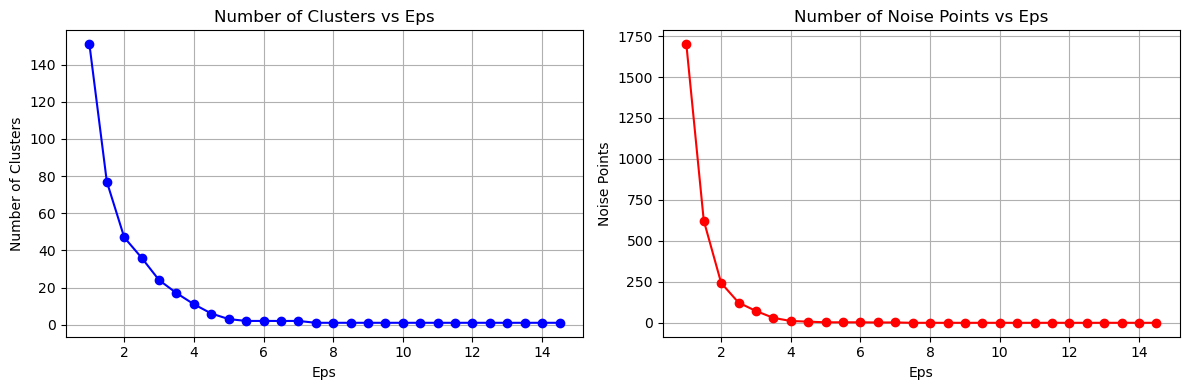

Optimal eps: 4.0


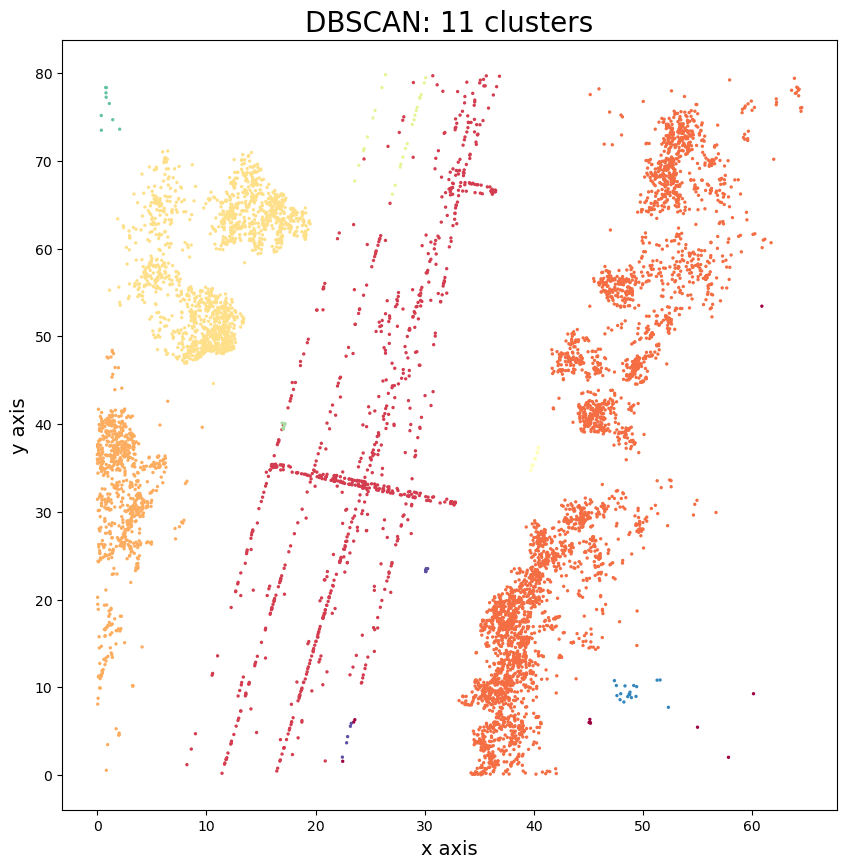

In [81]:

cluster_counts_2 = []
noise_counts_2 = []
for eps in eps_values:
    clustering_2 = DBSCAN(eps = eps, min_samples=5).fit(pcd2_above_ground)
    clusters_2 = len(set(clustering_2.labels_)) - (1 if -1 in clustering_2.labels_ else 0)
    cluster_counts_2.append(clusters_2)
    noise = list(clustering_2.labels_).count(-1)
    noise_counts_2.append(noise)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(eps_values, cluster_counts_2, 'b-o')
plt.title('Number of Clusters vs Eps')
plt.xlabel('Eps')
plt.ylabel('Number of Clusters')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(eps_values, noise_counts_2, 'r-o')
plt.title('Number of Noise Points vs Eps')
plt.xlabel('Eps')
plt.ylabel('Noise Points')
plt.grid(True)

plt.tight_layout()
plt.show()


optimal_eps_2 = find_elbow_distance_method(eps_values, cluster_counts_2)
print(f"Optimal eps: {optimal_eps_2}")

unoptimal_eps_2 = 4
# find the elbow
clustering_2 = DBSCAN(eps = unoptimal_eps_2, min_samples=5).fit(pcd2_above_ground)

#%%
clusters_2 = len(set(clustering_2.labels_)) - (1 if -1 in clustering_2.labels_ else 0)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, clusters_2)]

# %%
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(pcd2_above_ground[:,0], 
            pcd2_above_ground[:,1],
            c=clustering_2.labels_,
            cmap=matplotlib.colors.ListedColormap(colors),
            s=2)


plt.title('DBSCAN: %d clusters' % clusters_2,fontsize=20)
plt.xlabel('x axis',fontsize=14)
plt.ylabel('y axis',fontsize=14)
plt.show()

In [ ]:

'''
Task 3 (+1)

Find the largest cluster, since that should be the catenary, 
beware of the noise cluster.

Use the x,y span for the clusters to find the largest cluster

For both the datasets
Report min(x), min(y), max(x), max(y) for the catenary cluster in the Readme of your github project
Add the plot of the catenary cluster to the readme

'''
